#**EE P 596: Advanced Introduction to Machine Learning**
#**Project 2 Arrhythmia heartbeat classification Win23**
### Predict the heartbeat type based on the input heartbeat. 
### Due February 26th, 2023, by 11:59 PM <br> <br> 
###Team Kaggle Name: Rhythm Detectives <br>  
###Students: Naif Ganadily & Sarah Selim
####Instructor - Prof. Karthik Mohan 
####TA - Ayush Singh
####Grader - Fatwir SM

# Project 2 Overview

#### Arrhythmia or "irregular heart beats" is a very common heart rate problem and often goes un-diagnosed. This mini-project looks into super fine-grained data on heart beats and characteristics of normal and abnormal heartbeats. Having ML algorithms that can automate detection of possible Arrythmia is super impactful in helping doctors and hospitals be more efficient and effective in diagnosis and treatment of heart rate issues and also avert medical emergencies, prevent deaths.

# Submission Guidelines
*   You get to work in teams of 2 for the Kaggle and modeling piece!! Please make sure each person of the team gets to work on all aspects of the mini-project and mention at the top of your report the contributions from each person.
*   The submission is in 2 parts.
*   **Code:** Please submit a Jupyter/IPython notebook file, report and Kaggle predictions as part of your submission. You can start with the template notebook provided and add in your solutions to it.
*   **Report:** The report should be in a pdf format and have plots, correlation matrices and tables added in as mentioned in the **Heart Rate Delivariables below**. Feel free to use either LaTeX or word for creating it. Include answers to conceptual questions, and your insights as well. Ideally you should NOT use comments in ipynd to answer any conceptual question.
*   Kaggle Contest: There is a Kaggle competition as well, where you submit predictions on a "held out" data set.

# Dataset Description 
#### We have the following classes of heartbeats present in the dataset:
*   N: Normal beat
*   L: Left bundle branch block beat
*   R: Right bundle branch block beat
*   A: Atrial premature beat
*   V: Premature ventricular contraction
*   U: All other types of beats should be classified as this (this would require relabelling of the data)
<br> <br> 

The dataset contains 44 half-hour excerpts of two-channel ambulatory ECG recordings, obtained from 43 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979. The recordings were digitized at 360 samples per second per channel, and were labelled manually by cardiologists. You can only use MLII information to train the model for all the part except the last one, this is because we have maximum availablity of this feature. The txt file contains time, sample number and type of the heartbeat.

# Required preprocessing
#### The first objective is to split MIT-BIH record at the R-peaks into individual heartbeat records. This can be done by creating a file which shall have the required information from the csv and txt files. The txt file contains time, sample number and type of the heartbeat. For each row of txt files, take 180 samples before and 179 samples after this sample number to create a time series from the corresponding csv file with the corresponding type as the label. Hence the final file you shall create shall have 360 features, along with it's label. Feel free to try out any other pre-processing, and clearly explain the steps taken for it in the report.

# Heartbeat Prediction Deliverables


1.   Do the preprocessing defined in the previous cell. Then plot 3 heartbeats which are classified N and 3 which are classified as some other class. Is there a visible difference between these? How many heartbeats do you have in total? (30 points)

2.   Data normalization (can normalize to range [0,1]). Feel free to add any other pre-processing you deem useful. (5 points) (5 bonus points for any other pre-processing added)

3.   Class imbalance handling
 - Show the class imbalance present in the database with the help of plots. Do data augmentation using any method used in programming assignment 2. (10 points)
 - Show some plots of true anomalies and generated anomalies - And compare them side by side visually. (5 points)
 - Use an autoencoder to augment data for classes with lesser data (especially for the A class). (10 points)    

4.   Data deniosing 
 - Apply any noise reduction method (like Fourier transform, wavelet transform etc). Then plot the heartbeat with and without this filtering, and discuss the differences. Briefly describe how is your method useful. (HINT: Find a method to make the frequency component of noise zero) (10 points)
5.   Run at least one supervised linear model and one supervised Non-Linear midol on the processed dataset. Do hyperparameter tuning for the same. Show the confusion matrix, f1-score and accuracy score. Specifically mention the metrics for 'A' class as well. (20 points)


6.   Apply a feed-forward neural network and discuss it's performance w.r.t the machine learning model used (on metrics defined in previous question). (20 points)


7.   Treating the given problem as an unsupervised learning one, use STL + unsupervised learning (SMA, EMA) to detect anomalies and specifically show the metrics for the 'A' class. (25 points)


8.   Implement the neural network architecture from any recent paper on the MIT BIH Arrhythmia Database (check refrences for some papers). It is expected that the implementation should be your own and describe the approach taken. How was the performance of this model? Were you able to get similar scores to the reference paper? Submit your implementation as well. (20 bonus points)

9.   Plot the curves of training, validation and test sets losses and accuracy scores with number of epochs on the x-axis for the model which gave the best metrics. Show a table in which rows are the algorithms/ models used and having Precision, Recall and F1-score as metrics. (10 points)


10.   Interpretability - Print/plot examples or time-series snippets of mis-classified arrhythmia (False positives) and also false negatives. Why do you think the model might have done a mis-classification here? (10 points)


11.   Kaggle Submission (15 points)

 

1.   [✓]
2.   [✓]
3.   [✓] 
4.   [✓] 
5.   [✓] 
6.   [✓]
7.   [✓]
8.   [✓]
9.   [✓]
10.   [✓]
11.   [✓]

# Refrences
MIT-BIH Arrhythmia Database<br>
https://physionet.org/content/mitdb/1.0.0/ <br> <br>
Noise Reduction in ECG Signals Using Fully Convolutional Denoising Autoencoders <br>
https://ieeexplore.ieee.org/document/8693790 <br> <br> 
ECG arrhythmia classification by using a recurrence plot and convolutional neural network <br>
https://www.sciencedirect.com/science/article/abs/pii/S174680942030389X <br> <br> 
ECG Heartbeat Classification Using Convolutional Neural Networks <br>
https://ieeexplore.ieee.org/abstract/document/8952723 <br> <br> 
Generalization of Convolutional Neural Networks for ECG Classification Using Generative Adversarial Networks <br>
https://ieeexplore.ieee.org/abstract/document/9000871 <br> <br> 
AMSOM: Artifical metaplasticity in SOM neural networks - application to MIT-BIH arrhythmias database <br> 
https://link.springer.com/article/10.1007/s00521-018-3576-0


In [ ]:
# To use torch in python.
import torch

# To create a model by layers.
import torch.nn as nn
import torch.nn.functional as F

# To set the optimization.
import torch.optim as optim
from torch.optim import lr_scheduler

# To manipulate arrays.
import numpy as np

# To save the best model and get data files.
import os
import copy

import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

import pywt
from scipy import stats
import tsaug
import torch
import csv
from pathlib import Path

# Exercise 1

In [ ]:
def preprocessor():
  # Input: List of all csv and txt files.
  #data_folder = Path("../MiniProject2_HeartPulse/mitbih_database") #replace with os.getcwd()
  # Output: Single dataframe containing entire data.
  os.chdir('../MiniProject2_HeartPulse/mitbih_database')
  time = range(0,360)
  count = 0
  df_store = pd.DataFrame(columns=time)
  df_store['Type'] = []
  for filename in os.listdir(os.getcwd()):
    
    if '.txt' in filename:
      vals=filename.split('annotations')
      title = vals[0]
      print(title)
      csvtitle = title + '.csv'
      txt_df = pd.read_fwf(filename)
      txt_df.rename(columns = {'Sample #':'sample #'}, inplace = True)
      csv_df = pd.read_csv(csvtitle,sep=',',engine='python', error_bad_lines=False)
      
      lim=0
      if "'MLII'" in csv_df.columns:
        for i in range(txt_df.shape[0]):
          #print(txt_df.iloc[i]['Type'])
          if txt_df.loc[i]['Type'] in ['N'] and lim<250: #DELETE from HERE IF WANT TO USE ALL DATA
            lim += 1
            store_type = txt_df.loc[i]['Type']
            
            center_N = txt_df.loc[i]['sample #']
            
            lower = center_N-180+1
            upper = center_N+179+1
            
            if lower <0:
              lower =0
            if upper > csv_df.shape[0]-1:
              upper = csv_df.shape[0]
            dif = 359 - (upper - lower)  ########changed from 360 - trying to eliminate 0 in front
            
            if dif == 0:                    ################## changed - fix by reverting to red below - trying to discard rows that are not full 360 points
              vals =csv_df.loc[lower:upper]["'MLII'"]
              data = np.array(vals)
              data = np.append(data,store_type)
              df_store.loc[count] = data 
              count += 1
            
                     
          if txt_df.loc[i]['Type'] in ['R','A','L','V']:
            store_type = txt_df.loc[i]['Type']
            center_N = txt_df.loc[i]['sample #']
           
            lower = center_N-180+1
            upper = center_N+179+1
            
            if lower <0:
              lower =0
            if upper > csv_df.shape[0]-1:
              upper = csv_df.shape[0]
            
            dif = 359 - (upper - lower)  ########changed from 360 - trying to eliminate 0 in front
            
            if dif == 0:                    ################## changed - fix by reverting to red below - trying to discard rows that are not full 360 points
              vals =csv_df.loc[lower:upper]["'MLII'"]
              data = np.array(vals)
              data = np.append(data,store_type)
              df_store.loc[count] = data 
              count += 1
          
          if txt_df.loc[i]['Type'] not in ['N','R','A','L','V']:
            store_type = 'U'
            center_N = txt_df.loc[i]['sample #']

            lower = center_N-180+1
            upper = center_N+179+1
            
            if lower <0:
              lower =0
            if upper > csv_df.shape[0]-1:
              upper = csv_df.shape[0]
            
            dif = 359 - (upper - lower)  ########changed from 360 - trying to eliminate 0 in front
            
            if dif == 0:                    ################## changed - fix by reverting to red below - trying to discard rows that are not full 360 points
              vals =csv_df.loc[lower:upper]["'MLII'"]
              data = np.array(vals)
              data = np.append(data,store_type)
              df_store.loc[count] = data 
              count += 1
       
  return df_store

df_store = preprocessor()

  # It is best to keep functions short(20 lines max), so feel free to use helper functions here.

100
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
118
119
121
122
123
124
200
201
202
203
205
207
208
209
210
212
213
214
215
217
219
220
221
222
223
228
230


In [ ]:
df_store

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Type
0,956,961,964,964,966,965,966,967,969,973,...,958,958,955,955,955,960,958,957,956,N
1,951,952,951,956,959,961,960,958,958,960,...,950,952,951,952,951,948,950,951,954,N
2,949,952,956,957,958,957,957,959,960,963,...,957,958,957,956,957,960,956,956,954,N
3,961,960,959,961,965,967,964,965,967,967,...,958,960,961,959,957,953,955,956,957,N
4,940,943,948,950,951,951,951,955,958,961,...,962,962,958,957,958,960,959,959,958,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29841,1027,1026,1025,1024,1021,1020,1015,1013,1009,1007,...,953,953,955,957,960,960,960,960,955,N
29842,1061,1062,1059,1061,1061,1061,1061,1060,1058,1058,...,957,954,958,955,957,961,962,965,968,N
29843,1046,1051,1050,1049,1050,1049,1046,1043,1044,1044,...,967,968,967,968,966,968,966,968,971,N
29844,1048,1047,1043,1040,1041,1041,1046,1049,1050,1053,...,1006,1005,1002,1002,1004,1006,1008,1006,1004,N


In [ ]:
df_store.to_csv('df_store250U.csv', index=False, header=True, sep=',')

In [ ]:
df_store = pd.read_csv('df_store250U.csv',sep=',',engine='python', error_bad_lines=False)

In [ ]:
merged_df = df_store.copy()

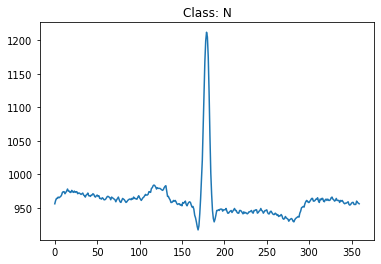

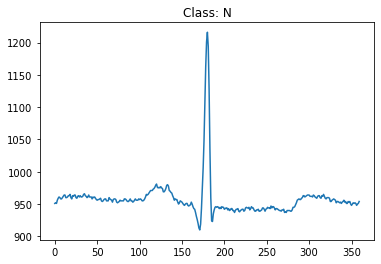

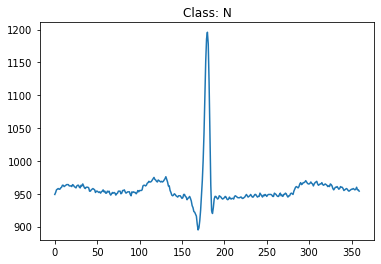

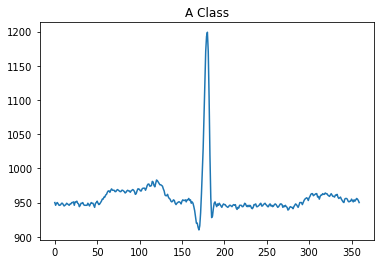

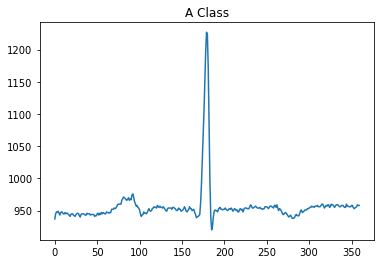

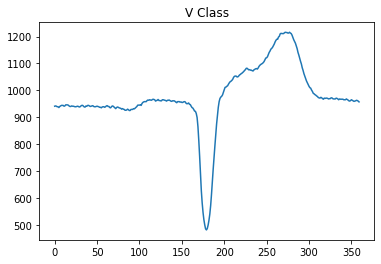

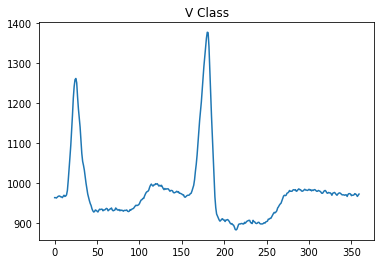

In [ ]:
def plotting(df,N=1,L=0,R=0,A=0,V=0):
  # Plot a few heartbeats here with proper labelling.
  N_df = df[df['Type'] == 'N']
  L_df = df[df['Type'] == 'L']
  R_df = df[df['Type'] == 'R']
  A_df = df[df['Type'] == 'A']
  V_df = df[df['Type'] == 'V']
  
  #U_df = merged_df[(merged_df['Type'] != 'N') & (merged_df['Type'] != 'L') & (merged_df['Type'] != 'R') & (merged_df['Type'] != 'A') & (merged_df['Type'] != 'V')]
  
  # Plot 3 heartbeats which are classified N and 3 which are classified as some other class
  time = list(range(360))
  #print(time)
  
  N_df = N_df.drop('Type', axis=1)
  A_df = A_df.drop('Type', axis=1)
  V_df = V_df.drop('Type', axis=1)
  R_df = R_df.drop('Type', axis=1)
  L_df = L_df.drop('Type', axis=1)

  for i in range(N):
    vals = N_df.iloc[i]
    #print(vals)
    plt.plot(time,vals)
    plt.title('Class: N')
    plt.show()
  for i in range(A):
    vals = A_df.iloc[i]
    plt.plot(time,vals)
    plt.title('A Class')
    plt.show()
  for i in range(V):
    vals = V_df.iloc[i]
    plt.plot(time,vals)
    plt.title('V Class')
    plt.show()
  for i in range(L):
    vals = L_df.iloc[i]
    plt.plot(time,vals)
    plt.title('L Class')
    plt.show()
  for i in range(R):
    vals = R_df.iloc[i]
    plt.plot(time,vals)
    plt.title('R Class')
    plt.show()

plotting(merged_df, N=3,A=2,V=2)

# Exercise 2

In [ ]:
categorical_df = merged_df['Type']
merged_df = merged_df.drop('Type', axis=1)



In [ ]:
def cleaning(df):

    # Replace non-numeric values with NaN
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Replace NaN values with 0
    df = df.fillna(0)

    return df

In [ ]:
def normalizer(df):
    # Normalize all features to [0, 1] range
    df_normalized = (df - df.min()) / (df.max() - df.min())
    df_normalized = df_normalized.fillna(0)
    return df_normalized
# normalize the cleaned dataframe

In [ ]:
clean_data=cleaning(merged_df)
normalized_df = normalizer(clean_data)
normalized_df['Type'] = categorical_df

In [ ]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Type
0,0.545930,0.521293,0.494992,0.496259,0.500414,0.497565,0.498002,0.515397,0.521388,0.538868,...,0.468002,0.468002,0.466536,0.466536,0.466536,0.468979,0.468002,0.467513,0.467025,N
1,0.542196,0.514196,0.484140,0.489609,0.494624,0.494318,0.493205,0.508104,0.512510,0.529057,...,0.464094,0.465071,0.464582,0.465071,0.464582,0.463117,0.464094,0.464582,0.466048,N
2,0.540702,0.514196,0.488314,0.490441,0.493797,0.491071,0.490807,0.508914,0.514124,0.531321,...,0.467513,0.468002,0.467513,0.467025,0.467513,0.468979,0.467025,0.467025,0.466048,N
3,0.549664,0.520505,0.490818,0.493766,0.499586,0.499188,0.496403,0.513776,0.519774,0.534340,...,0.468002,0.468979,0.469468,0.468490,0.467513,0.465559,0.466536,0.467025,0.467513,N
4,0.533981,0.507098,0.481636,0.484622,0.488007,0.486201,0.486011,0.505673,0.512510,0.529811,...,0.469956,0.469956,0.468002,0.467513,0.468002,0.468979,0.468490,0.468490,0.468002,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,0.554145,0.528391,0.500835,0.503741,0.503722,0.500812,0.501998,0.519449,0.523810,0.537358,...,0.479726,0.477772,0.476307,0.477284,0.476795,0.478261,0.479726,0.479238,0.479238,N
34315,0.545930,0.515773,0.489149,0.493766,0.495451,0.491071,0.490008,0.506483,0.515738,0.532075,...,0.479726,0.480215,0.479238,0.477772,0.476307,0.477284,0.478749,0.478749,0.478261,N
34316,0.607170,0.596215,0.594324,0.620948,0.648470,0.668019,0.684253,0.726904,0.753027,0.761509,...,0.475330,0.475818,0.474353,0.473864,0.473864,0.474353,0.475330,0.475330,0.472887,V
34317,0.551158,0.522871,0.491653,0.493766,0.496278,0.496753,0.500400,0.516207,0.518160,0.532075,...,0.466048,0.467025,0.467025,0.468979,0.468002,0.467025,0.465559,0.465071,0.466536,V


# Exercise 3

In [ ]:
from imblearn.over_sampling import SMOTE

L    8071
N    7729
U    6924
R    5605
V    5117
A     873
Name: Type, dtype: int64


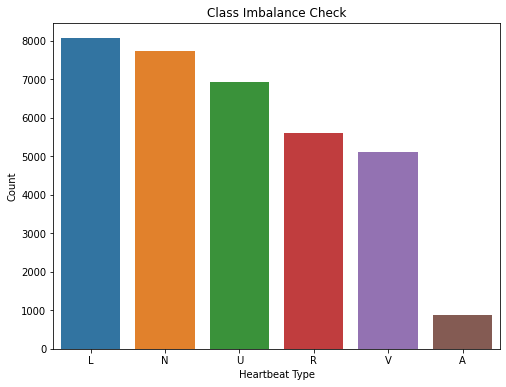

In [ ]:
def class_imbalance_checker(dataframe):
    # Get the count of each heartbeat type in the dataframe
    counts = dataframe['Type'].value_counts()
    print(counts)
    # Plot the counts using a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Class Imbalance Check')
    plt.xlabel('Heartbeat Type')
    plt.ylabel('Count')
    plt.show()
class_imbalance_checker(normalized_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# instantiating the LabelEncoder
le = LabelEncoder()

# encoding the 'Type' column
normalized_df['Type'] = le.fit_transform(normalized_df['Type'])

In [ ]:
X = normalized_df.drop('Type', axis=1).values
y = normalized_df['Type'].values

In [ ]:
#Methods
# randomly under sample extra N class examples since there are 100 times more
# Augment data by creating example data in low categories

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

def imbalance_remover_1(X, y):
    # Implement a method to handle class imbalance.
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
        # Plot the original class distribution
    plt.bar(np.unique(y), np.bincount(y))
    plt.title('Original Class Distribution')
    plt.show()

    # Plot the new class distribution after SMOTE
    plt.bar(np.unique(y_resampled), np.bincount(y_resampled))
    plt.title('New Class Distribution after SMOTE')
    plt.show()
    return X_resampled, y_resampled

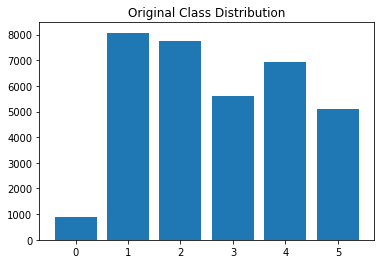

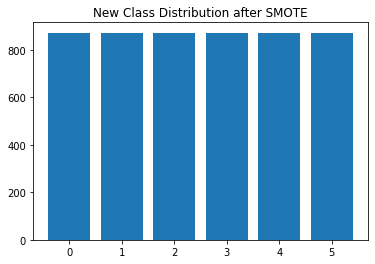

In [ ]:
balanced_X, balanced_y = imbalance_remover_1(X, y)
balanced_X[np.isnan(balanced_X)] = 0

In [ ]:
!pip install tsaug

(360,)


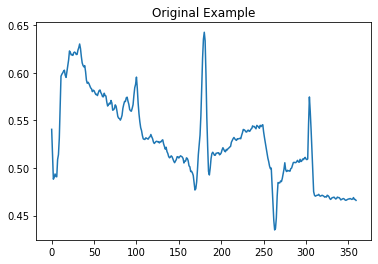

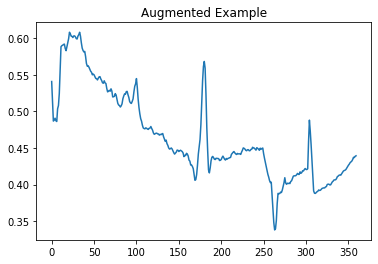

In [ ]:
from tsaug import Drift
timeperiod = np.arange(360)

my_augmenter = (Drift(max_drift=(0.1, 0.5)) @ 0.8)  

X_aug, time_aug = my_augmenter.augment(X[2],timeperiod) 
print(np.shape(X_aug))

vals = X[2]
plt.plot(timeperiod,vals)
plt.title('Original Example')
plt.show()

vals = X_aug
plt.plot(time_aug,vals)
plt.title('Augmented Example')
plt.show()

# Exercise 4

In [ ]:
import pywt
import pandas as pd

In [ ]:
def noise_remover1(X):
    # Apply wavelet denoising to all heartbeats
    denoised_X = []
    for x in X:
        # Perform wavelet decomposition with 3 levels using the db4 wavelet
        coeffs = pywt.wavedec(x, 'db4', level=3)
        # Set the smallest detail coefficients to zero
        coeffs[1:] = [pywt.threshold(c, 0.5, mode='soft') for c in coeffs[1:]]
        # Reconstruct the denoised heartbeat
        denoised_x = pywt.waverec(coeffs, 'db4')
        denoised_X.append(denoised_x)
    return np.array(denoised_X)


In [ ]:
noise_x=noise_remover1(balanced_X)

In [ ]:
print(X.shape)
print(noise_x.shape)
print(type(X))

(34319, 360)
(5238, 360)
<class 'numpy.ndarray'>


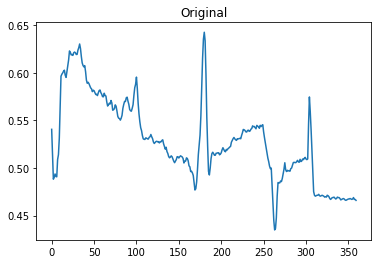

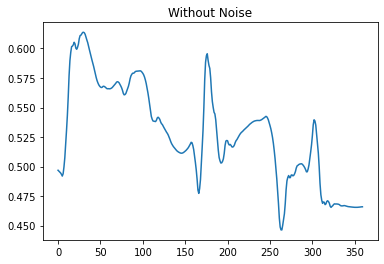

In [ ]:
timeperiod = list(range(360))
vals = X[2]
plt.plot(timeperiod,vals)
plt.title('Original')
plt.show()

vals_noise = noise_x[2]
plt.plot(timeperiod,vals_noise)
plt.title('Without Noise')
plt.show()

In [ ]:
X[np.isnan(X)] = 0

In [ ]:
y

array([2, 2, 2, ..., 2, 2, 4])

# Exercise 5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [ ]:
# Splitting the dataset into train, val and test sets.
# 2.0
X_train, X_val, y_train, y_val = train_test_split(noise_x, balanced_y, test_size=0.2, random_state=42) #############changes to noise X to train model
#X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
print(y_train)

[3 2 5 ... 5 5 0]


In [ ]:
# Code for different models used.

def Model1(X_train, y_train,X_val,y_val):

  # Train a logistic regression model
  logreg = LogisticRegression(random_state=42)
  logreg = logreg.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = logreg.predict(X_val)

  # Compute the confusion matrix, F1 score, and accuracy score on the validation set
  conf_mat = confusion_matrix(y_val, y_val_pred)
  f1 = f1_score(y_val, y_val_pred, average='weighted')
  acc = accuracy_score(y_val, y_val_pred)

  print('Logistic regression:')
  print('Confusion matrix:')
  print(conf_mat)
  print('F1 score:', f1)
  print('Accuracy score:', acc)
  print()
  return logreg


In [ ]:
# Code for different models used.

def Model2(X_train, y_train,X_val,y_val):
  
  # Train a random forest model
  rf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf= 5)
  rf = rf.fit(X_train, y_train)

  # Make predictions on the validation set
  y_val_pred = rf.predict(X_val)

  # Compute the confusion matrix, F1 score, and accuracy score on the validation set
  conf_mat = confusion_matrix(y_val, y_val_pred)
  f1 = f1_score(y_val, y_val_pred, average='weighted')
  acc = accuracy_score(y_val, y_val_pred)

  print('Random forest:')
  print('Confusion matrix:')
  print(conf_mat)
  print('F1 score:', f1)
  print('Accuracy score:', acc)
  print()
  return rf

In [ ]:
M1 = Model1(X_train, y_train,X_val,y_val)

Logistic regression:
Confusion matrix:
[[112   5  41  35   3   2]
 [  2 119  26   0   0  26]
 [ 33  12  96   9   2  11]
 [  1   3   8 152   0   0]
 [  6  27  21   1  91  29]
 [ 14  15   5   4  12 125]]
F1 score: 0.6607311218167035
Accuracy score: 0.6631679389312977



In [ ]:
M2 = Model2(X_train, y_train,X_val,y_val)

Random forest:
Confusion matrix:
[[174   0  14   6   2   2]
 [  0 167   1   0   3   2]
 [  9   2 149   0   3   0]
 [  1   0   4 157   1   1]
 [  2   3   5   1 152  12]
 [  6   1   3   1   4 160]]
F1 score: 0.9151215195123332
Accuracy score: 0.9150763358778626



Testing Kaggle data to Models 1 and 2

In [ ]:
df_kag = pd.read_csv('../MiniProject2_HeartPulse/kaggle.csv',sep=',', engine='python', quoting=csv.QUOTE_NONE)

In [ ]:
id =df_kag['Id']
X_final = df_kag.drop('Id', axis=1)
clean_X = cleaning(X_final)
normalized_X = normalizer(clean_X)
#normalized_X[np.isnan(normalized_X)] = 0

normalized_X = normalized_X.to_numpy()

noise_X = noise_remover1(normalized_X)

y_predict = M2.predict(noise_X)
print(y_predict)
y_final = le.inverse_transform(y_predict)
print(y_final)

[4 4 4 ... 2 2 2]
['U' 'U' 'U' ... 'N' 'N' 'N']


In [ ]:
excel = pd.DataFrame(index=None)
filepath = Path('C:/UW_PMP_Masters/EE__P_594_A_Machine_Learning/MiniProject2_HeartPulse/kaggle_M2.csv')  
excel['Id']=id
excel['heartbeat_type']=y_final
#print(excel)
excel.to_csv(filepath, index=False) 

# Exercise 6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
model = tf.keras.models.Sequential()
from keras import models, layers, optimizers, regularizers, metrics
from tensorflow.keras.layers import Dense
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
hidden_units = 20     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.001  # how big our steps are in gradient descent
epochs = 50           # how many epochs to train for
batch_size = 1000      # how many samples to use for each gradient descent update

In [ ]:
# create a sequential model
model6 = Sequential()

# add the hidden layer
model6.add(layers.Dense(input_dim=X_train.shape[1],
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model6.add(layers.Dense(input_dim=hidden_units,
                       units=6,
                       activation='softmax'))

# define our loss function and optimizer
model6.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics= ['accuracy'])
    

In [ ]:
# train the parameters
#history6 = model6.fit(X_train, y_train, epochs=epochs)
history6=model6.fit(X_train, y_train,epochs=epochs, batch_size=80,validation_data=(X_val,y_val))

# evaluate accuracy
train_acc = model6.evaluate(X_train, y_train)
test_acc = model6.evaluate(X_val, y_val)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history6.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### RUN IT AGAIN! ###

In [ ]:
def plotting_ffn(history):
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.
    # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

    # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.  

In [ ]:
# Plot the training and validation curves
plotting_ffn(history6)

In [ ]:
# Calculate the metrics for the model
y_pred = model6.predict(X_val)
y = y_pred.argmax(1)
y_pred6 = le.inverse_transform(y)
y_valout = le.inverse_transform(y_val)
#y_final = np.array(y)
print(y_pred6)
print(y_valout)

In [ ]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
def metrics(y_pred, y_true):
  #pass
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1score = f1_score(y_true, y_pred, average='macro')
  accuracy = accuracy_score(y_true, y_pred)
    
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1score)
  print("Accuracy:", accuracy)
    
  return
  # Takes input the predicted and true labels.
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models

In [ ]:
metrics(y_pred6, y_valout)

# Exercise 7

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [ ]:
df_mini = pd.read_csv('df_mini.csv',sep=',',engine='python',error_bad_lines='skip', quoting=csv.QUOTE_NONE)

In [ ]:
categorical_df = df_mini['Type']
merged_df = df_mini.drop('Type', axis=1)
clean_data=cleaning(merged_df)
normalized_df1 = normalizer(clean_data)
#print(normalized_df1)

All_data=normalized_df1.copy()
#A_data = noise_remover1(normalized_df)
og=All_data.shape
A_data = np.array(All_data)
A_data = A_data.ravel()

In [ ]:
# Apply STL decomposition
period = 360
stl = sm.tsa.STL(A_data, period)
res = stl.fit()
trend = res.trend
seasonal = res.seasonal
residual = res.resid

In [ ]:
# Smooth residual using exponential moving average (EMA)
residual = pd.DataFrame(residual, columns=['Value'])
ema = residual.ewm(span=30).mean()

# Calculate moving average of smoothed residual using rolling window
sma2 = ema.rolling(window=50, center=True).mean()

# Calculate anomaly scores based on difference between smoothed residual and moving averages
sma1 = ema.rolling(window=10, center=True).mean()
anomaly_scores = np.abs(sma1['Value'] - sma2['Value'])

# Threshold the anomaly scores to identify anomalies
threshold = anomaly_scores.mean() + 2 * anomaly_scores.std()

In [ ]:
# Identify the indices of the anomalies
anomaly_indices = np.where(anomaly_scores > threshold)[0]

# Create a new column 'Anomaly' in normalized_df to store the anomaly output

All_data['Anomaly'] = 0
index= np.floor(anomaly_indices/360)
index = np.int16(index)
index = np.unique(index)
print(index)
All_data['Anomaly'].iloc[index] = 1

In [ ]:
anoms = categorical_df!='N'
ans=categorical_df[anoms].index.values

inter = np.intersect1d(index,ans)
score = len(inter)/len(ans)
print(score)

# Exercise 8

Model based on https://ieeexplore.ieee.org/abstract/document/8952723
and
https://www.kaggle.com/code/gregoiredc/arrhythmia-on-ecg-classification-using-cnn

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X_train1 = X_train.reshape(len(X_train), X_train.shape[1],1)
X_val1 = X_val.reshape(len(X_val), X_val.shape[1],1)
y_train1=to_categorical(y_train)
y_val1=to_categorical(y_val)

In [ ]:
def network(X_train,y_train,X_test,y_test):

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(6, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=25,callbacks=callbacks, batch_size=80,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
model8,history8=network(X_train1,y_train1,X_val1,y_val1)

In [ ]:
#evaluate_model(history8,X_val1,y_val1,model8)
y_pred8=model8.predict(X_val1)
y_pred8 = y_pred8.argmax(1)
y_pred8 = le.inverse_transform(y_pred8)

In [ ]:
plotting_ffn(history8)

# Exercise 9

In [ ]:
plotting_ffn(history6)
metrics(y_pred6, y_valout)
plotting_ffn(history8)
metrics(y_pred8, y_valout)

In [ ]:
def plot_final():
  # lot examples or time-series snippets of
  # mis-classified arrhythmia (False positives) and also false negatives.


# Exercise 10

In [ ]:
# Find the indices of false positives and false negatives for Class R
false_positives = np.where((y_pred8 == 'R') & (y_valout != 'R'))
print('False Positive Quantity:',len(false_positives[0]))
false_negatives = np.where((y_pred8 != 'R') & (y_valout == 'R'))
print('False Negative Quantity:',len(false_negatives[0]))


for i in range(1):
    plt.figure(figsize=(8, 6))
    plt.title('False Class R Positive')
    plt.xlabel('Time')
    plotX = X_val[false_positives[0][i]]
    plt.plot(plotX)
    plt.show()

for i in range(1):
    plt.figure(figsize=(8, 6))
    plt.title('False Class R Negative')
    plt.xlabel('Time')
    plotX = X_val[false_negatives[0][i]]
    plt.plot(plotX)
    plt.show()


In [ ]:
df_kag = pd.read_csv('kaggle.csv',sep=',',engine='python',error_bad_lines='skip', quoting=csv.QUOTE_NONE)

In [ ]:
id =df_kag['Id']
X_final = df_kag.drop('Id', axis=1)
clean_X = cleaning(X_final)
normalized_X = normalizer(clean_X)
#normalized_X[np.isnan(normalized_X)] = 0
normalized_X = normalized_X.to_numpy()
noise_X = noise_remover1(normalized_X)
noise_X = noise_X.reshape(len(noise_X), noise_X.shape[1],1) #only for model 8

y_predict = model8.predict(noise_X)
#print(y_predict)
#y_predict = np.array(y_predict).astype(int)
y = y_predict.argmax(1)
#print(y)
y_final = le.inverse_transform(y)
#y_final = np.array(y)
print(y_final)

In [ ]:
excel = pd.DataFrame(index=None)
filepath = Path('C:/UW_PMP_Masters/EE__P_594_A_Machine_Learning/MiniProject2_HeartPulse/kaggle_M8unbalanced.csv')  
excel['Id']=id
excel['heartbeat_type']=y_final
#print(excel)
excel.to_csv(filepath, index=False) 